# importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings

In [9]:
df = pd.read_csv('rea_games_dataset_updated.csv', lineterminator = '\n')
df.head()

,Game ID,Game Name,Platform,Genre,Release Date,Sales (Million $),Player Count (Million),Region,Age Group,Gender,Rating
0,GAME00001,Write always.,Xbox,RPG,2021-09-02,56.06,25.41,South America,46+,Male,1
1,GAME00002,Return.,Nintendo Switch,Adventure,2024-09-04,81.41,41.88,Asia,10-18,Female,8
2,GAME00003,Vote beautiful.,PC,Sports,2024-08-22,44.51,47.32,Asia,10-18,Male,8
3,GAME00004,Five operation be.,PC,Sports,2022-07-28,91.69,32.97,Australia,19-25,Male,8
4,GAME00005,Current above recent.,Xbox,Sports,2018-02-11,79.79,39.50,North America,46+,Female,8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game ID                 50000 non-null  object 
 1   Game Name               50000 non-null  object 
 2   Platform                50000 non-null  object 
 3   Genre                   50000 non-null  object 
 4   Release Date            50000 non-null  object 
 5   Sales (Million $)       50000 non-null  float64
 6   Player Count (Million)  50000 non-null  float64
 7   Region                  50000 non-null  object 
 8   Age Group               50000 non-null  object 
 9   Gender                  50000 non-null  object 
 10  Rating                  50000 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


# data cleaning

In [11]:
# converting release date to datetime 
df['Release Date']= pd.to_datetime(df['Release Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Game ID                 50000 non-null  object        
 1   Game Name               50000 non-null  object        
 2   Platform                50000 non-null  object        
 3   Genre                   50000 non-null  object        
 4   Release Date            50000 non-null  datetime64[ns]
 5   Sales (Million $)       50000 non-null  float64       
 6   Player Count (Million)  50000 non-null  float64       
 7   Region                  50000 non-null  object        
 8   Age Group               50000 non-null  object        
 9   Gender                  50000 non-null  object        
 10  Rating                  50000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 4.2+ MB


In [13]:
df.describe()

,Release Date,Sales (Million $),Player Count (Million),Rating
count,50000,50000.000000,50000.000000,50000.000000
mean,2019-10-08 06:07:58.656000256,50.216254,24.974368,5.511440
min,2014-10-02 00:00:00,0.500000,0.100000,1.000000
25%,2017-04-13 00:00:00,25.517500,12.520000,3.000000
50%,2019-10-08 00:00:00,50.335000,24.950000,6.000000
75%,2022-04-07 00:00:00,75.040000,37.380000,8.000000
max,2024-10-01 00:00:00,100.000000,50.000000,10.000000
std,NaN,28.645562,14.357901,2.880957


<Axes: ylabel='count'>

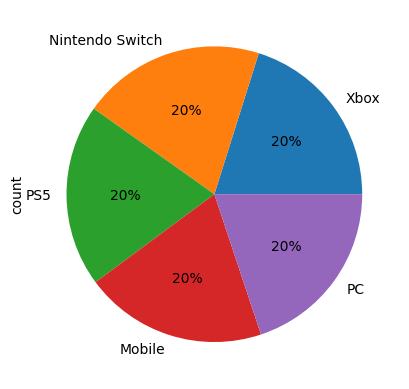

In [14]:
df['Platform'].value_counts().plot(kind = 'pie', autopct = '%.0f%%')

In [15]:
# games with highest sales
top_selling_games = df.sort_values(by= 'Sales (Million $)', ascending = False).head(10)

# games with lowest sales
lowest_selling_games = df.sort_values(by = 'Sales (Million $)', ascending = True).head(10)

print(top_selling_games[['Game Name', 'Sales (Million $)']])

print(lowest_selling_games[['Game Name', 'Sales (Million $)']])

                          Game Name  Sales (Million $)
26641                 Find eat say.             100.00
49231                    Eat those.             100.00
1583          Value feel the light.              99.99
32170  Opportunity single material.              99.99
20006              Laugh know join.              99.99
24376               From trip best.              99.99
47566           Speak board myself.              99.99
10830            All whatever song.              99.99
8221                   Some school.              99.99
32773               Record country.              99.99
                       Game Name  Sales (Million $)
18119             Forward teach.               0.50
7568     Smile between practice.               0.50
33477     Land participant name.               0.50
24363         Full also purpose.               0.50
29849  Nature building law only.               0.50
37689         Chair note moment.               0.50
45249                Must floor

In [16]:
# Total sales by genre
total_sales_by_genre = df.groupby("Genre")['Sales (Million $)'].sum().sort_values(ascending = False)

# total sales by platform
total_sales_by_platform = df.groupby("Platform")['Sales (Million $)'].sum().sort_values(ascending = False)

print(total_sales_by_genre, '\n')

print(total_sales_by_platform)

Genre
Adventure    430790.91
Shooter      426503.66
Sports       418723.04
Strategy     416704.01
RPG          414758.71
Action       403332.38
Name: Sales (Million $), dtype: float64 

Platform
Xbox               506054.76
Nintendo Switch    504620.78
PS5                503418.09
Mobile             498627.49
PC                 498091.59
Name: Sales (Million $), dtype: float64


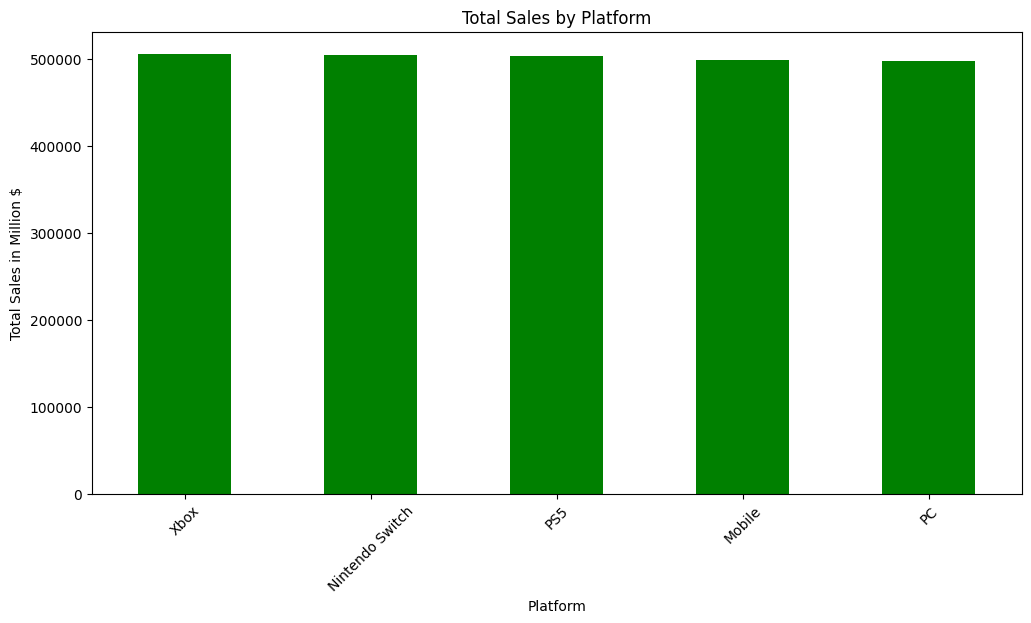

In [19]:
9# plotting total sales by platform
plt.figure(figsize = (12,6))
total_sales_by_platform.plot(kind = 'bar', color = 'green')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales in Million $')
plt.xticks(rotation = 45)
plt.show()

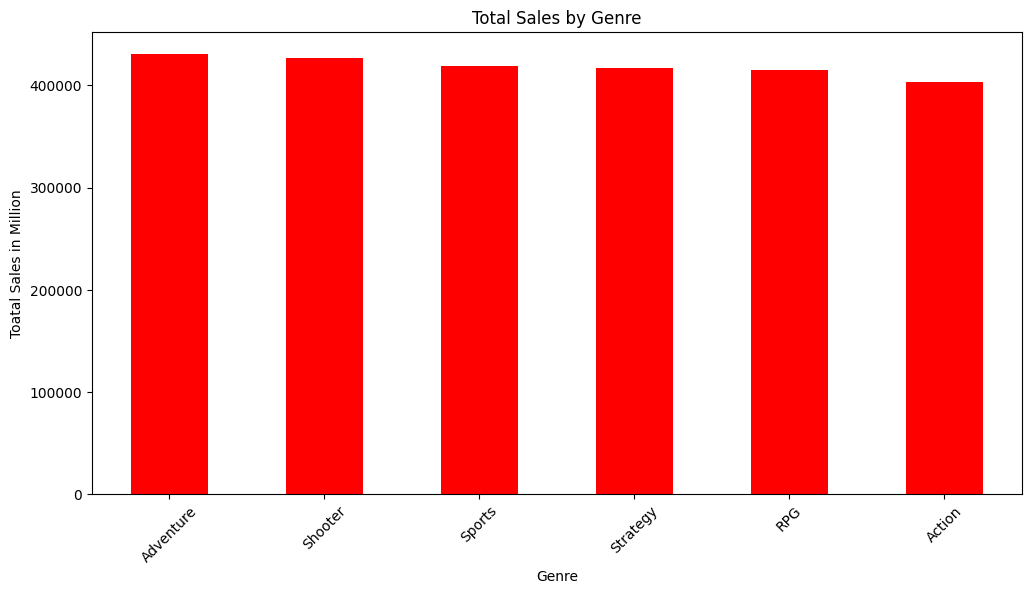

In [20]:
# plotting sales by genre
plt.figure(figsize= (12, 6))
total_sales_by_genre.plot(kind = 'bar', color = 'red')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Toatal Sales in Million')
plt.xticks(rotation = 45)
plt.show()

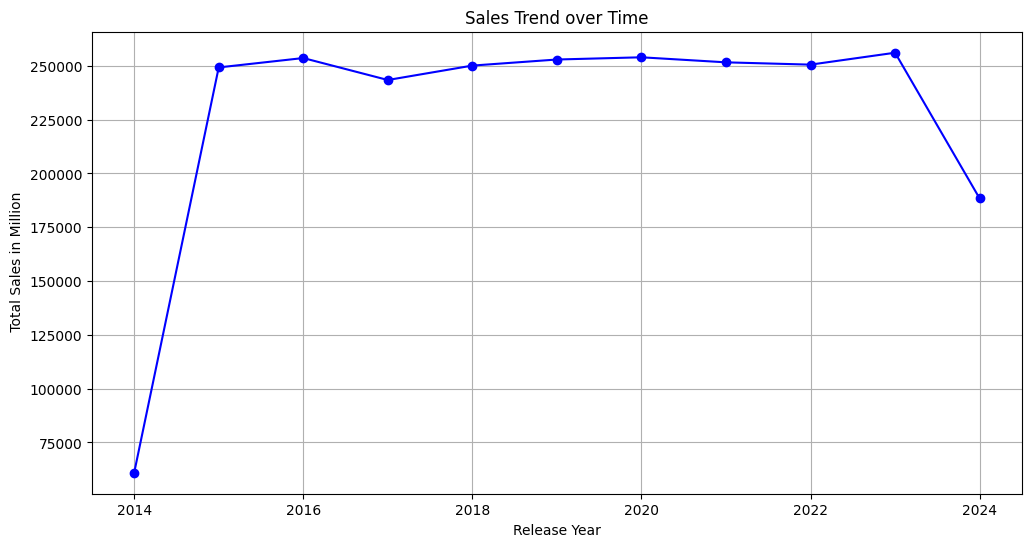

In [21]:
# extracting year fom release date
df['Release Year']= df['Release Date'].dt.year

# grouping by release year and calculating total sales
sales_by_year = df.groupby("Release Year")['Sales (Million $)'].sum().sort_index()

# plotting sales trend over time
plt.figure(figsize = (12,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker = "o", color = 'blue')
plt.title('Sales Trend over Time')
plt.xlabel('Release Year')
plt.ylabel(' Total Sales in Million')
plt.grid(True)
plt.show()

C:\Users\deshwar\AppData\Local\Temp\ipykernel_4808\997348099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = player_distribution_age.index, y= player_distribution_age.values, palette = 'viridis')


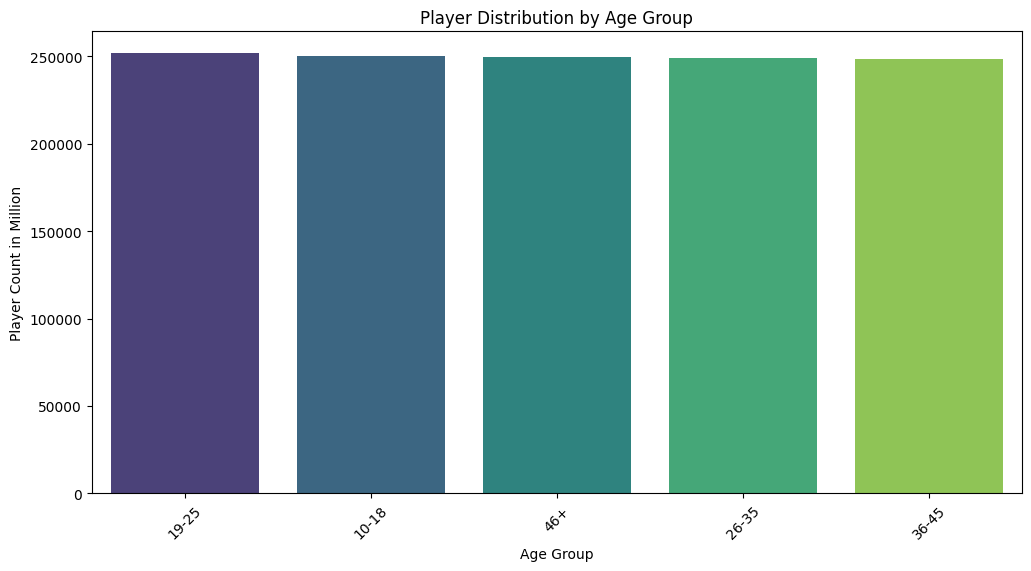

In [22]:
# calculating distribution by age group 
player_distribution_age = df.groupby("Age Group")['Player Count (Million)'].sum().sort_values(ascending = False)

plt.figure(figsize = (12,6))
sns.barplot(x = player_distribution_age.index, y= player_distribution_age.values, palette = 'viridis')
plt.title('Player Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Player Count in Million')
plt.xticks(rotation = 45)
plt.show()

C:\Users\deshwar\AppData\Local\Temp\ipykernel_4808\530199599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = player_distribution_region.index, y = player_distribution_region.values, palette = 'plasma')


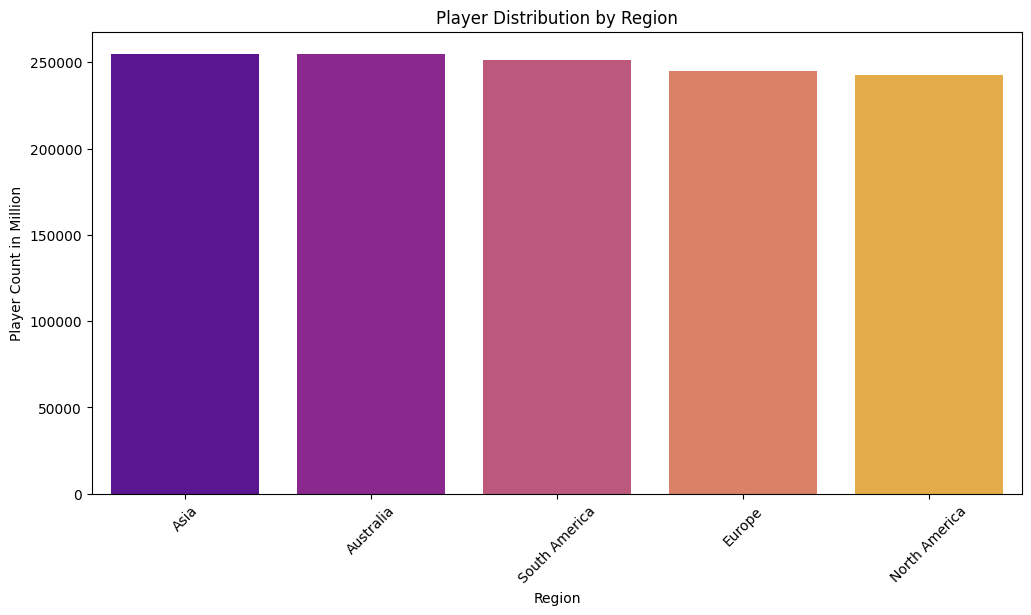

In [24]:
# calculationg player distribution by region
player_distribution_region = df.groupby("Region")['Player Count (Million)'].sum().sort_values(ascending = False)

plt.figure(figsize = (12,6))
sns.barplot(x = player_distribution_region.index, y = player_distribution_region.values, palette = 'plasma')
plt.title("Player Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Player Count in Million")
plt.xticks(rotation = 45)
plt.show()

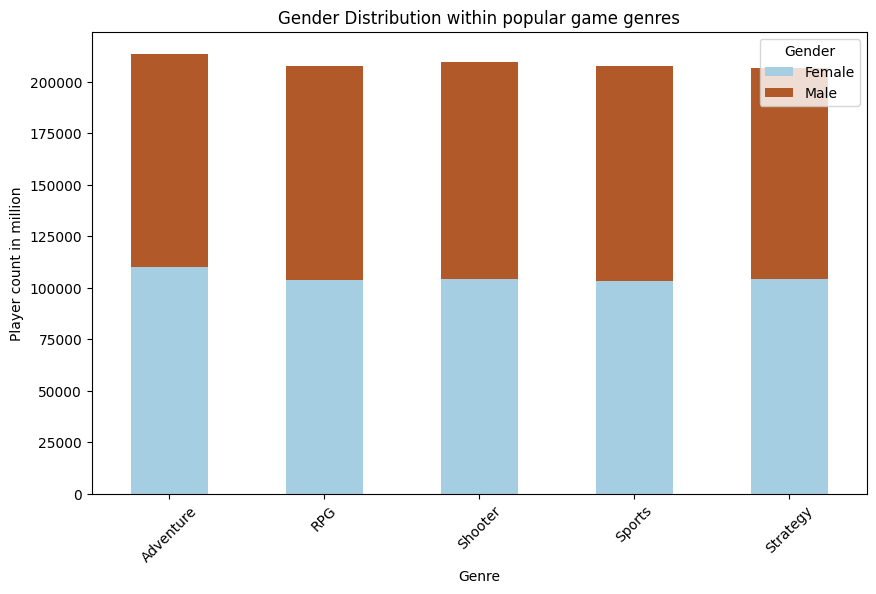

In [26]:
# filter popular genre
# top 5 genre by player count
popular_genres = df.groupby("Genre")['Player Count (Million)'].sum().nlargest(5).index

# Group by genre and gender, summing the player count
gender_distribution = df[df['Genre'].isin(popular_genres)].groupby(['Genre', 'Gender'])['Player Count (Million)'].sum().unstack()

gender_distribution.plot(kind = 'bar', stacked = True, figsize = (10,6), colormap = 'Paired')
plt.title('Gender Distribution within popular game genres')
plt.xlabel('Genre')
plt.ylabel('Player count in million')
plt.xticks(rotation = 45)
plt.legend(title = 'Gender')
plt.show()

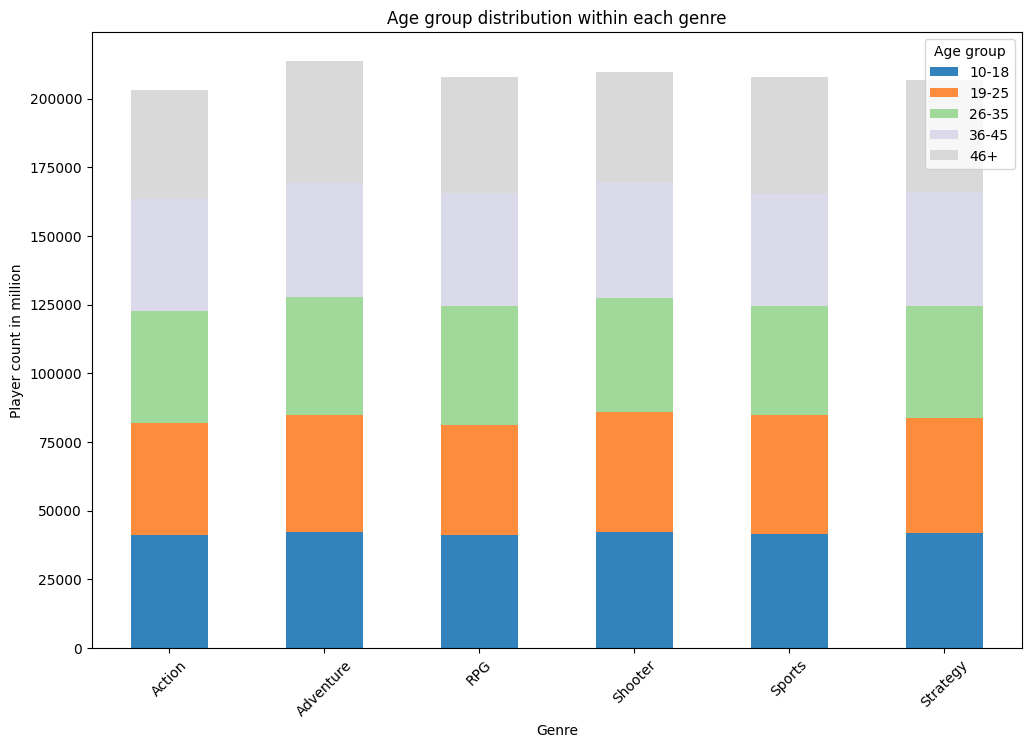

In [29]:
# grouping by genre and age group
age_genre_distribution = df.groupby(['Genre', 'Age Group'])['Player Count (Million)'].sum().unstack()

# plotting syacked bar chart to show age distribution within each genre
age_genre_distribution.plot(kind = 'bar', stacked = True, figsize = (12,8), colormap= 'tab20c')
plt.title('Age group distribution within each genre')
plt.xlabel('Genre')
plt.ylabel('Player count in million')
plt.xticks(rotation =45)
plt.legend(title = 'Age group')
plt.show()

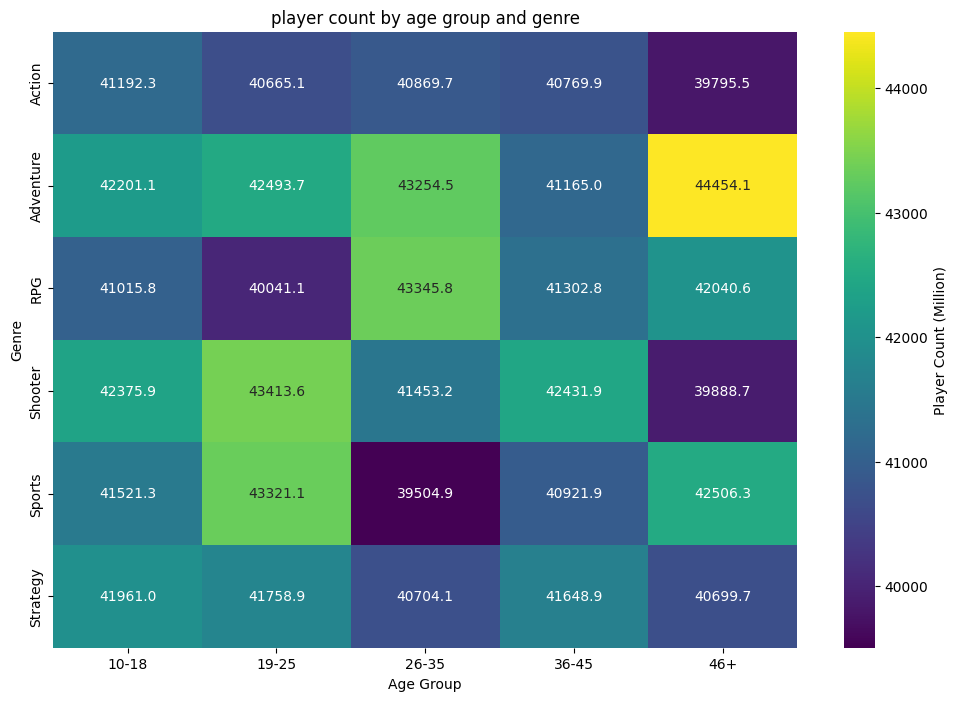

In [32]:
plt.figure(figsize = (12,8))
sns.heatmap(age_genre_distribution, annot = True, fmt = '.1f', cmap= 'viridis', cbar_kws = {'label': 'Player Count (Million)'})
plt.title('player count by age group and genre')
plt.xlabel('Age Group')
plt.ylabel('Genre')
plt.show()

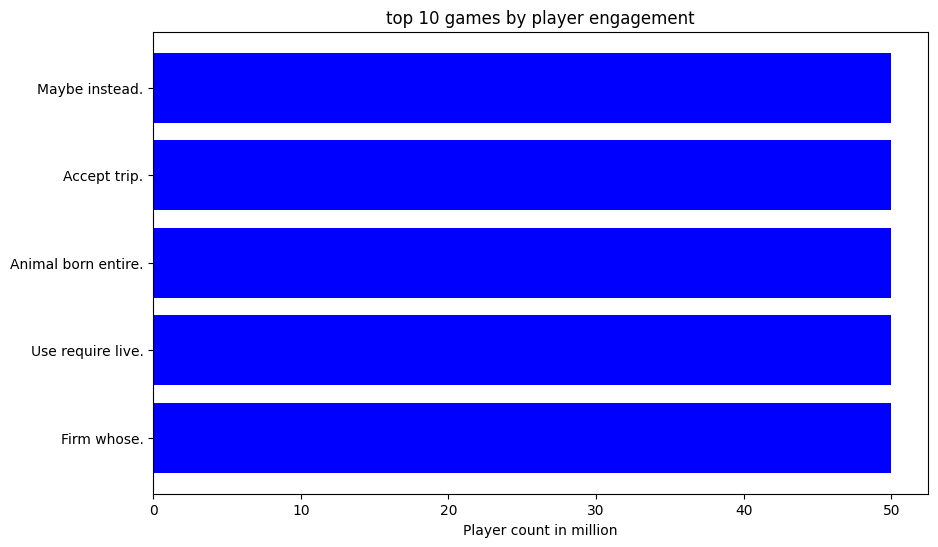

In [33]:
top_engaged_games = df.sort_values(by = 'Player Count (Million)', ascending = False).head()
plt.figure(figsize=(10,6))
plt.barh(top_engaged_games['Game Name'], top_engaged_games['Player Count (Million)'], color ='blue')
plt.xlabel('Player count in million')
plt.title('top 10 games by player engagement')
plt.gca().invert_yaxis()
plt.show()

In [37]:
# calculating the average rating by genre
avg_rating_by_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending = False)

#calculating average rating by paltform
avg_rating_by_platform = df.groupby('Platform')['Rating'].mean().sort_values(ascending = False)

print(avg_rating_by_genre, '\n')
print(avg_rating_by_platform)

Genre
Adventure    5.534892
Strategy     5.532192
Sports       5.510280
Shooter      5.506152
RPG          5.496197
Action       5.487715
Name: Rating, dtype: float64 

Platform
Xbox               5.546520
PS5                5.517127
Nintendo Switch    5.510781
PC                 5.499195
Mobile             5.483221
Name: Rating, dtype: float64


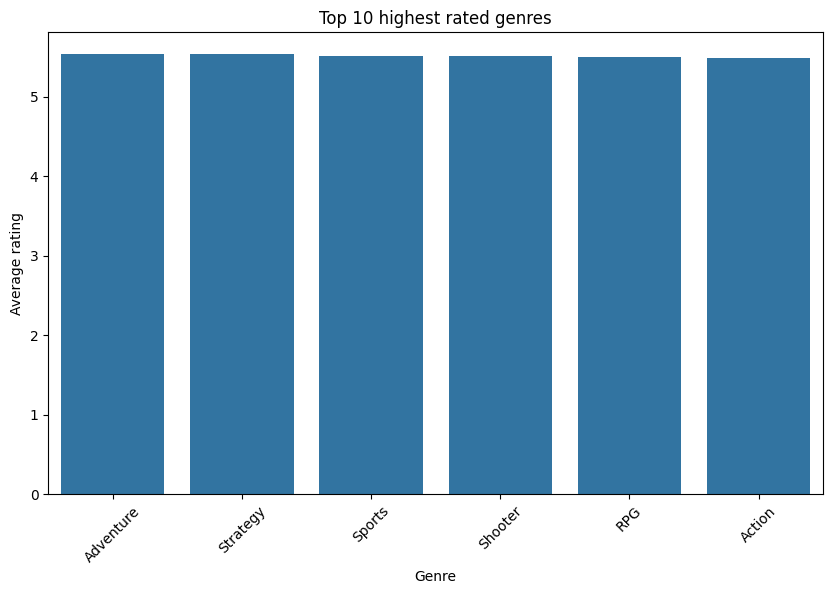

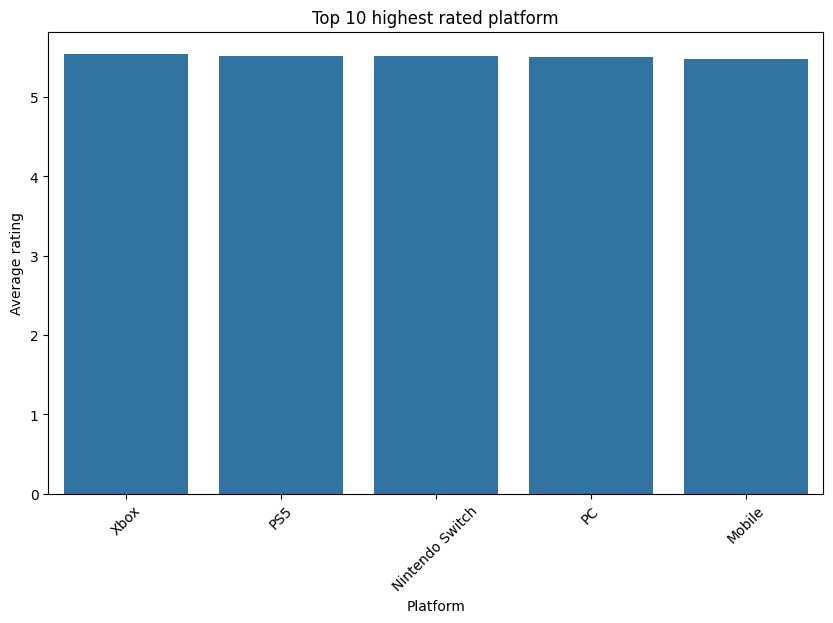

In [39]:
# plot for highest rated genres
plt.figure(figsize = (10,6))
sns.barplot(x= avg_rating_by_genre.head(10).index, y= avg_rating_by_genre.head(10).values)
plt.title('Top 10 highest rated genres')
plt.xlabel('Genre')
plt.ylabel('Average rating')
plt.xticks(rotation = 45)
plt.show()

# plot for highest rated platforms
plt.figure(figsize = (10,6))
sns.barplot(x= avg_rating_by_platform.head(10).index, y= avg_rating_by_platform.head(10).values)
plt.title('Top 10 highest rated platform')
plt.xlabel('Platform')
plt.ylabel('Average rating')
plt.xticks(rotation = 45)
plt.show()

                          Rating  Player Count (Million)  Sales (Million $)
Rating                  1.000000               -0.007585           0.006786
Player Count (Million) -0.007585                1.000000           0.008388
Sales (Million $)       0.006786                0.008388           1.000000 



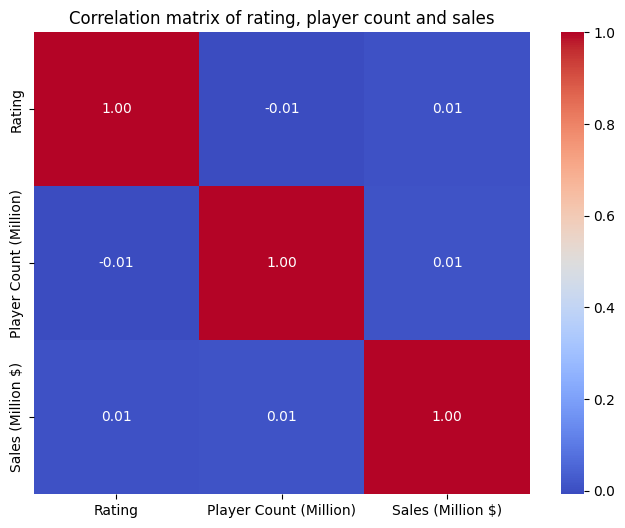

In [41]:
# correlation between rating, player ,sales
correlation_matrix = df[['Rating', 'Player Count (Million)', 'Sales (Million $)']].corr()
print(correlation_matrix, '\n')

# plot correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation matrix of rating, player count and sales')
plt.show()

               Sales (Million $)  Player Count (Million)
Region                                                  
Asia                   508279.16               254981.46
Australia              510237.60               254780.58
Europe                 496609.76               245174.79
North America          486710.83               242453.32
South America          508975.36               251328.23 

Age Group      10-18  19-25  26-35  36-45   46+
Region                                         
Asia            2018   2043   1981   2124  1923
Australia       2035   2044   2058   1980  2038
Europe          1985   1988   1919   1941  1994
North America   2029   1976   1952   1864  1984
South America   2029   2010   2019   1962  2104 

Gender         Female  Male
Region                     
Asia             5040  5049
Australia        5130  5025
Europe           5020  4807
North America    4889  4916
South America    4970  5154 



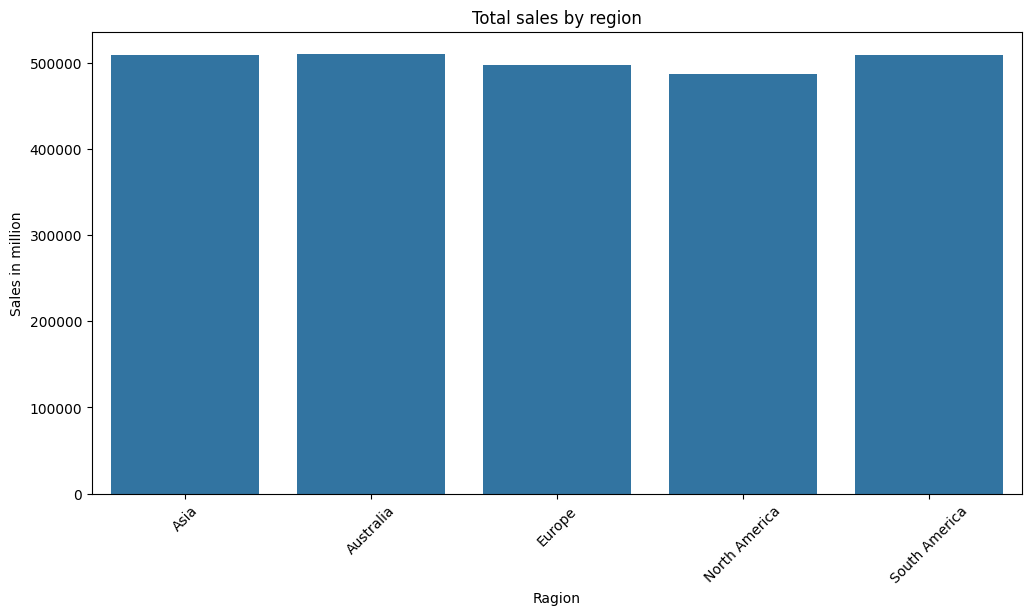

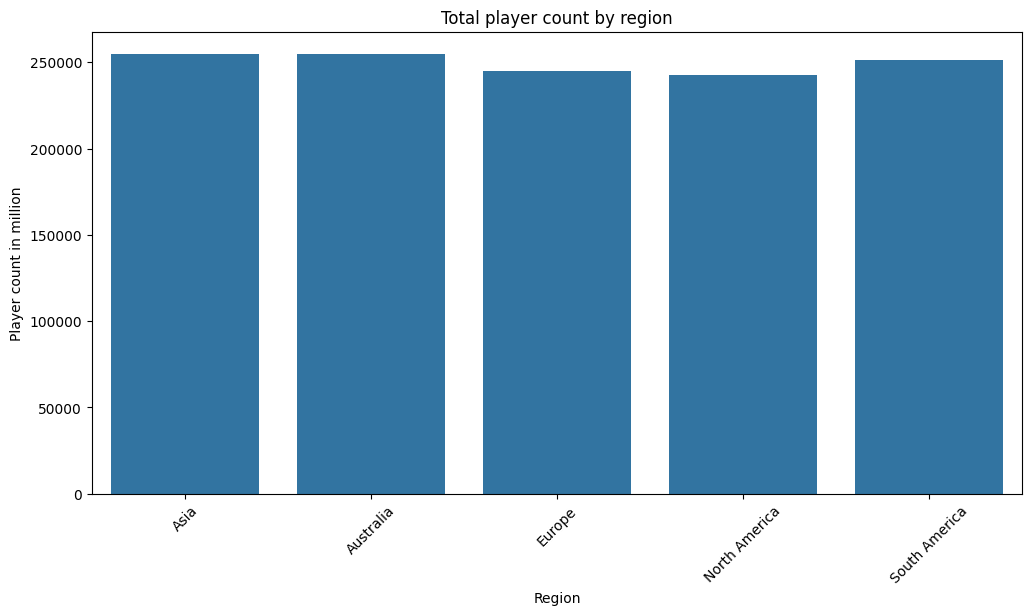

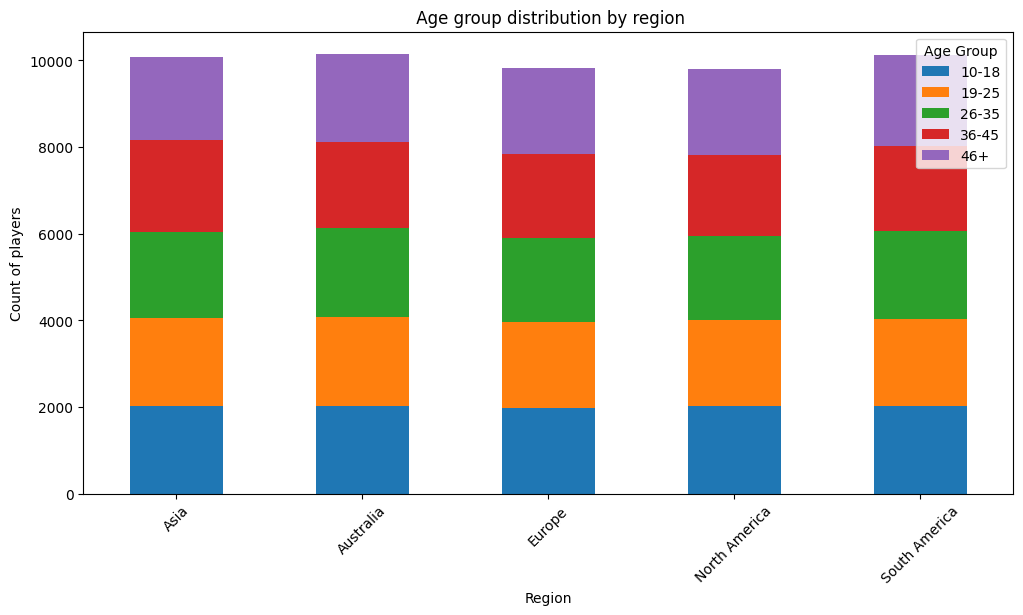

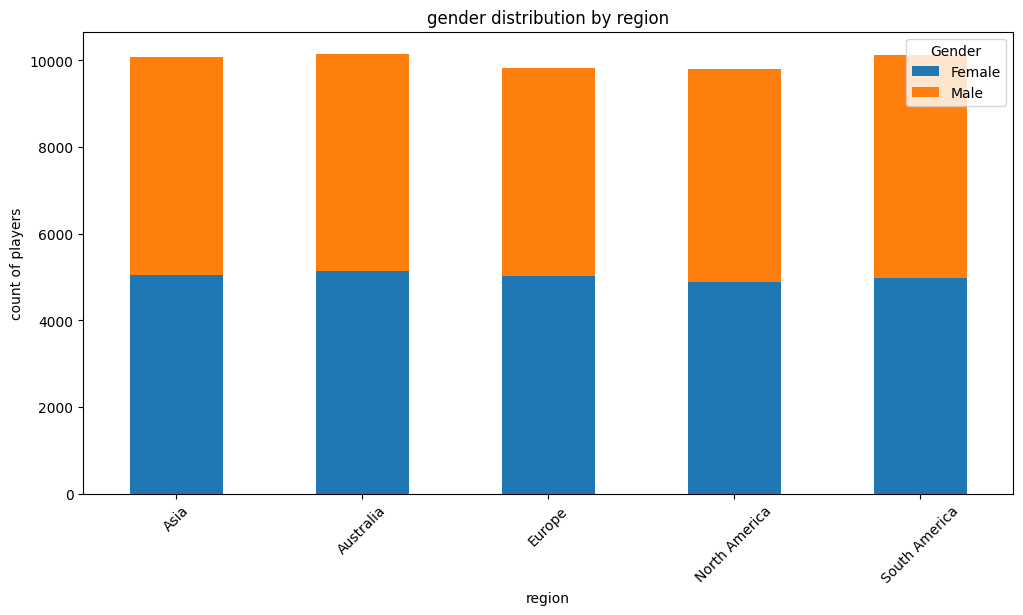

In [42]:
# group by region and summarize sales and player count
sales_by_region = df.groupby('Region')[['Sales (Million $)', 'Player Count (Million)']].sum()

# group by region and analyze demographics
age_group_by_region = df.groupby('Region')['Age Group'].value_counts().unstack(fill_value = 0)
gender_group_by_region = df.groupby('Region')['Gender'].value_counts().unstack(fill_value = 0)

print(sales_by_region, '\n')
print(age_group_by_region, '\n')
print(gender_group_by_region, '\n')

# plot total sales by region
plt.figure(figsize=(12,6))
sns.barplot(x= sales_by_region.index, y= 'Sales (Million $)', data = sales_by_region)
plt.title('Total sales by region')
plt.xticks(rotation= 45)
plt.xlabel('Ragion')
plt.ylabel('Sales in million')
plt.show()

# plot player count by region
plt.figure(figsize= (12,6))
sns.barplot(x= sales_by_region.index, y= 'Player Count (Million)', data= sales_by_region)
plt.title('Total player count by region')
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Player count in million')
plt.show()

# plot age group distribution by region
age_group_by_region.plot(kind ='bar', stacked = True, figsize = (12,6))
plt.title(' Age group distribution by region')
plt.xlabel('Region')
plt.ylabel('Count of players')
plt.xticks(rotation = 45)
plt.show()

# plot gender distribution by region
gender_group_by_region.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.title('gender distribution by region')
plt.xlabel('region')
plt.ylabel('count of players')
plt.xticks(rotation = 45)
plt.show()